In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import csv
iris_data = load_iris()

x = iris_data.data
y = iris_data.target

x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state=0)

print(f"x_train len: {len(x_train)} y_train len: {len(y_train)}")
print(f"x_test len: {len(x_test)} y_test len: {len(y_test)}")

x_train len: 120 y_train len: 120
x_test len: 30 y_test len: 30
x_train len: 120 y_train len: 120


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                50        
                                                                 
 dense_61 (Dense)            (None, 20)                220       
                                                                 
 dense_62 (Dense)            (None, 10)                210       
                                                                 
 dense_63 (Dense)            (None, 5)                 55        
                                                                 
 dense_64 (Dense)            (None, 3)                 18        
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s

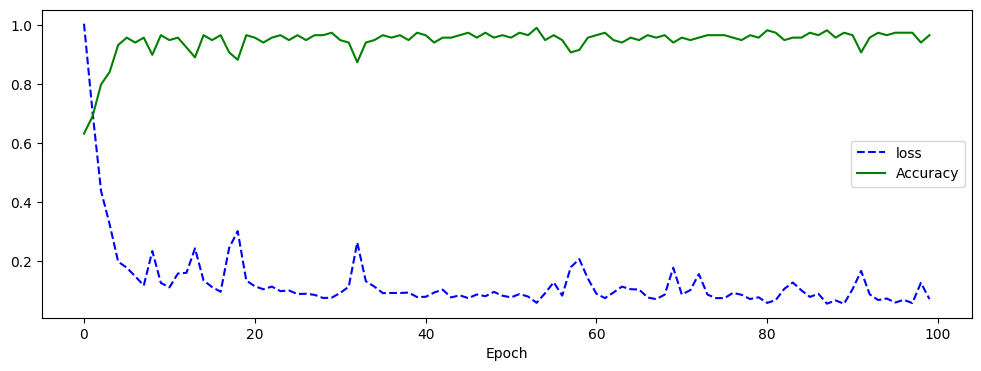

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                50        
                                                                 
 dense_26 (Dense)            (None, 20)                220       
                                                                 
 dense_27 (Dense)            (None, 10)                210       
                                                                 
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 3)                 18        
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0297 - accuracy: 1.0000 - 128ms/epoch

In [46]:
import io
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

iris_data = load_iris()

x = iris_data.data
y = iris_data.target

x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state=0)

model = Sequential()
model.add(Dense(input_dim = 4 , units = 10 , activation = 'relu'))
model.add(Dense(units=20 , activation = 'relu'))
model.add(Dense(units=10 , activation = 'relu'))
model.add(Dense(units=5 , activation = 'relu'))
model.add(Dense(units=3 , activation = 'softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

history = model.fit(x_train , y_train , epochs = 100 , batch_size = 10)

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행1열의 첫 번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') #loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') #accuracy 는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()

#model.save("C:/Users/sss00/Documents/Tensorflow/Study/csvs/iris_model.h5")

new_model = tf.keras.models.load_model("C:/Users/sss00/Documents/Tensorflow/Study/csvs/iris_model.h5")

new_model.summary()

loss , acc = new_model.evaluate(x_test , y_test , verbose = 2)
print(f"복원된 모델의 정확도 : {acc*100}%")




=============initial weights==========
<tf.Variable 'dense_65/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.34941924],
       [ 0.38289976]], dtype=float32)>
<tf.Variable 'dense_65/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
<tf.Variable 'dense_66/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.5570412 ,  0.3197183 , -0.21945286,  0.6464254 , -0.5761282 ,
         0.53641695,  0.37729162,  0.3219239 , -0.48555633,  0.32346505]],
      dtype=float32)>
<tf.Variable 'dense_66/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_67/kernel:0' shape=(10, 7) dtype=float32, numpy=
array([[ 0.34569   ,  0.53362453,  0.24227536,  0.0149048 , -0.5749944 ,
        -0.54495007, -0.09238851],
       [ 0.50259125, -0.38926354, -0.2817433 , -0.0438959 ,  0.41697252,
         0.48011482,  0.47279298],
       [ 0.34130108,  0.21509546, -0.21987489,  0.23796862,  0.51899743,
         0.23348

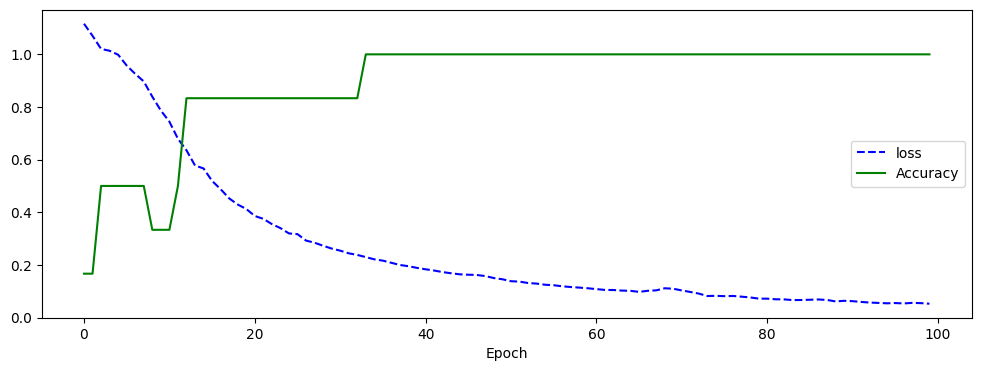

In [48]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 1대 1로 매칭해서 학습을 시켜놧기에 0 0 -> 바퀴없고 날개없으면 배다 그렇기에 이값이 바뀌게 될경우 정확도는 떨어지게된다.
#[ 바퀴 , 날개 ] 있으면 1 아니면 0
x_data = np.array(
    [[0,0] , [1,0] , [1,1] , [0,0] , [0,0] , [0,1]]
)

# 라벨 데이터
y_data = np.array([
    [1 , 0 , 0], # 배
    [0 , 1 , 0], # 자동차
    [0 , 0 , 1], # 비행기
    [1 , 0 , 0], # 배 
    [1 , 0 , 0], # 배
    [0 , 0 , 1]  # 비행기
])


# 모델 구성
model = Sequential()

model.add(Dense(input_dim = 2, units = 1, activation='relu')) # relu
#model.add(Dense(input_dim = 2, units = 1 , activation='sigmoid')) # sigmoid
#model.add(Dense(input_dim = 2, units = 1, activation='tanh')) # tanh
# 은닉층
# relu
model.add(Dense(units = 10, activation='relu')) 
model.add(Dense(units = 7, activation='relu')) 
model.add(Dense(units = 5, activation='relu')) 
# sigmoid
""" model.add(Dense(units = 10, activation='sigmoid')) 
model.add(Dense(units = 7, activation='sigmoid')) 
model.add(Dense(units = 5, activation='sigmoid'))  """
# tanh
""" model.add(Dense(units = 10, activation='tanh')) 
model.add(Dense(units = 7, activation='tanh')) 
model.add(Dense(units = 5, activation='tanh')) 
 """
# 3개의 유닛을 가지는 출력층
model.add(Dense(units = 3 , activation="softmax"))

print("=============initial weights==========")
for weight in model.weights:
    print(weight)

# 모델 컴파일
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.02) , loss = 'categorical_crossentropy' , metrics=['accuracy'])
#model.compile(optimizer=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.4) , loss = 'categorical_crossentropy' , metrics=['accuracy'])
#model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.3) , loss = 'categorical_crossentropy' , metrics=['accuracy'])
# 모델 설명
model.summary()

history = model.fit(x_data, y_data, epochs=100 , batch_size=1)

print("=============weights==========")
for weight in model.weights:
    print(weight)

print("=============test results==========")
# 모델 결과 예측
print(model.predict(x_data))

# 모델 평가
print("\n Accuracy : %.4f" % (model.evaluate(x_data, y_data)[1]))

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행1열의 첫 번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') #loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') #accuracy 는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()